In [6]:
import numpy                 as np
import pandas                as pd
import matplotlib.pyplot     as plt
import seaborn               as sns
from datetime import datetime as dt
import gmaps 
import gmaps.datasets 
%matplotlib inline
sns.set()

In [7]:
# df = pd.read_csv('data/Miriam VonAschen-Cook - Crime_Data.csv', nrows=10000)
# C:\Users\annet\Desktop\DS4A\spd_final_project\spd-use-of-force_DS4A\data\Miriam VonAschen-Cook - Crime_Data.csv
# df.head()

# parse_dates=[] converts datatype to datetime
df = pd.read_csv (r'C:\Users\annet\Desktop\DS4A\spd_final_project\spd-use-of-force_DS4A\data\Miriam VonAschen-Cook - Crime_Data.csv', parse_dates=['Offense Start DateTime', 'Report DateTime'], nrows=10000)
df.head(10)  

,GO,Offense ID,Offense Start DateTime,Report DateTime,Crime Against Category,Offense,NIBRS Offense Code,Precinct,Sector,Beat,MCPP,100 Block Address,Longitude,Latitude
0,20200000044620,12605873663,2020-02-05 10:10:00,2020-02-05 11:24:00,SOCIETY,Drug/Narcotic Violations,35A,W,Q,Q1,MAGNOLIA,32XX BLOCK OF 23RD AVE W,-122.385974,47.649387
1,20200000044452,12605598696,2020-02-03 08:00:00,2020-02-05 10:06:00,PROPERTY,Theft of Motor Vehicle Parts or Accessories,23G,N,J,J3,ROOSEVELT/RAVENNA,63XX BLOCK OF 5TH AVE NE,-122.323399,47.675118
2,20200000044465,12605567653,2020-02-02 20:30:00,2020-02-05 09:39:00,PROPERTY,Robbery,120,N,U,U3,ROOSEVELT/RAVENNA,26TH AVE NE / NE BLAKELEY ST,-122.299552,47.666384
3,20200000044225,12605174036,2020-02-05 01:17:00,2020-02-05 03:30:00,PROPERTY,Destruction/Damage/Vandalism of Property,290,W,Q,Q1,MAGNOLIA,22XX BLOCK OF W RAYE ST,-122.384865,47.642927
4,20200000044076,12605081469,2020-02-05 00:51:00,2020-02-05 00:51:00,SOCIETY,Driving Under the Influence,90D,N,B,B2,BALLARD SOUTH,NW 46TH ST / 8TH AVE NW,-122.366195,47.662193
5,20200000044142,12605077150,2020-02-04 22:59:00,2020-02-05 00:45:00,PROPERTY,Shoplifting,23C,W,M,M1,DOWNTOWN COMMERCIAL,14XX BLOCK OF 2ND AVE,-122.338449,47.608789
6,20200000044104,12605029468,2020-02-04 20:30:00,2020-02-04 23:31:00,PROPERTY,Destruction/Damage/Vandalism of Property,290,N,J,J3,PHINNEY RIDGE,71XX BLOCK OF GREENWOOD AVE N,-122.355309,47.680527
7,20200000043988,12604995759,2020-02-04 19:58:00,2020-02-04 22:46:00,PROPERTY,Shoplifting,23C,SW,F,F2,ROXHILL/WESTWOOD/ARBOR HEIGHTS,26XX BLOCK OF SW BARTON ST,-122.367312,47.521028
8,20200000043928,12604963106,2020-02-04 19:01:00,2020-02-04 21:59:00,SOCIETY,Driving Under the Influence,90D,N,L,L2,NORTHGATE,15TH AVE NE / NE 95TH ST,-122.312078,47.697616
9,20200000044065,12605008517,2020-02-04 21:00:00,2020-02-04 21:47:00,PROPERTY,Theft From Motor Vehicle,23F,E,E,E2,CAPITOL HILL,15XX BLOCK OF 12TH AVE,-122.316845,47.614684


In [8]:
# CLEANING THE DATA
df["Crime Against Category"] = df["Crime Against Category"].astype('category')
df["Offense"] = df["Offense"].astype('category')
df["NIBRS Offense Code"] = df["NIBRS Offense Code"].astype('category')
df["Precinct"] = df["Precinct"].astype('category')
df["Sector"] = df["Sector"].astype('category')
df["Beat"] = df["Beat"].astype('category')

In [9]:
df.dtypes

GO                                 int64
Offense ID                         int64
Offense Start DateTime    datetime64[ns]
Report DateTime           datetime64[ns]
Crime Against Category          category
Offense                         category
NIBRS Offense Code              category
Precinct                        category
Sector                          category
Beat                            category
MCPP                              object
100 Block Address                 object
Longitude                        float64
Latitude                         float64
dtype: object

Where are the precincts/sectors/beats with the most instances of offenses?
-What do the demographics of the population look like? (age, race, ethnicity, income)
-What does the ratio of officers to population look like in these areas? (More policing in some areas...)
-What are the most common languages spoken, literacy rate?

In [8]:
df['Offense Start DateTime'].value_counts().sort_values(ascending = False)
# What happened on the days with most numbers of offenses?

2019-12-01 00:00:00    17
2019-11-27 00:00:00    15
2020-01-24 00:00:00    14
2019-12-19 00:00:00    13
2019-11-26 00:00:00    13
                       ..
2019-12-23 13:30:00     1
2019-12-22 01:01:00     1
2020-02-01 01:32:00     1
2020-01-23 22:04:00     1
2020-02-02 10:45:00     1
Name: Offense Start DateTime, Length: 6976, dtype: int64

In [9]:
df.columns

Index(['GO', 'Offense ID', 'Offense Start DateTime', 'Report DateTime',
       'Crime Against Category', 'Offense', 'NIBRS Offense Code', 'Precinct',
       'Sector', 'Beat', 'MCPP', '100 Block Address', 'Longitude', 'Latitude'],
      dtype='object')

In [10]:
df[['Crime Against Category', 'Offense', 'NIBRS Offense Code', 'Precinct','Sector', 'Beat', 'MCPP', '100 Block Address']].describe()

,Crime Against Category,Offense,NIBRS Offense Code,Precinct,Sector,Beat,MCPP,100 Block Address
count,10000,10000,10000,10000,10000,10000,10000,9728
unique,3,43,43,6,19,53,58,5321
top,PROPERTY,Theft From Motor Vehicle,23F,N,U,U2,DOWNTOWN COMMERCIAL,14XX BLOCK OF 2ND AVE
freq,9146,2726,2726,3254,955,334,806,52


In [11]:
# df[df['Precinct']=='U'][['Crime Against Category','Offense', 'MCPP']].groupby('Precinct').head()
df[['Precinct',"Offense", 'Crime Against Category']].value_counts().sort_values(ascending = False).head(50)

Precinct  Offense                                      Crime Against Category
N         Theft From Motor Vehicle                     PROPERTY                  1005
W         Theft From Motor Vehicle                     PROPERTY                   767
N         All Other Larceny                            PROPERTY                   511
E         Theft From Motor Vehicle                     PROPERTY                   403
W         All Other Larceny                            PROPERTY                   341
N         Destruction/Damage/Vandalism of Property     PROPERTY                   332
W         Destruction/Damage/Vandalism of Property     PROPERTY                   288
SW        Theft From Motor Vehicle                     PROPERTY                   283
N         Motor Vehicle Theft                          PROPERTY                   274
S         Theft From Motor Vehicle                     PROPERTY                   267
W         Theft From Building                          PROPERT

In [12]:
# df[['Precinct',"Offense", 'Crime Against Category']].value_counts().sort_values(ascending = False).head(50)
df[['Precinct','Sector','Beat', "Offense", 'Crime Against Category']].groupby(['Precinct']).head(10)

,Precinct,Sector,Beat,Offense,Crime Against Category
0,W,Q,Q1,Drug/Narcotic Violations,SOCIETY
1,N,J,J3,Theft of Motor Vehicle Parts or Accessories,PROPERTY
2,N,U,U3,Robbery,PROPERTY
3,W,Q,Q1,Destruction/Damage/Vandalism of Property,PROPERTY
4,N,B,B2,Driving Under the Influence,SOCIETY
5,W,M,M1,Shoplifting,PROPERTY
6,N,J,J3,Destruction/Damage/Vandalism of Property,PROPERTY
7,SW,F,F2,Shoplifting,PROPERTY
8,N,L,L2,Driving Under the Influence,SOCIETY
9,E,E,E2,Theft From Motor Vehicle,PROPERTY


In [13]:
# by='col1', ascending=False, na_position='first'
df[['Precinct', 'Sector',"Offense", 'Crime Against Category']].sort_values(by='Precinct',ascending = False).head(10)

,Precinct,Sector,Offense,Crime Against Category
0,W,Q,Drug/Narcotic Violations,SOCIETY
2141,W,M,Theft From Motor Vehicle,PROPERTY
5912,W,Q,Identity Theft,PROPERTY
5910,W,Q,Theft From Motor Vehicle,PROPERTY
5908,W,D,Theft From Building,PROPERTY
2133,W,K,Stolen Property Offenses,PROPERTY
5906,W,K,All Other Larceny,PROPERTY
5900,W,M,Stolen Property Offenses,PROPERTY
5899,W,M,Drug/Narcotic Violations,SOCIETY
5895,W,M,False Pretenses/Swindle/Confidence Game,PROPERTY


In [14]:
#Need to import plotly
# px.scatter(df, x="Offense", y="Crime Against Category", color = "MCPP")

In [15]:
df2 = df.copy()
df2.head(10)

,GO,Offense ID,Offense Start DateTime,Report DateTime,Crime Against Category,Offense,NIBRS Offense Code,Precinct,Sector,Beat,MCPP,100 Block Address,Longitude,Latitude
0,20200000044620,12605873663,2020-02-05 10:10:00,2020-02-05 11:24:00,SOCIETY,Drug/Narcotic Violations,35A,W,Q,Q1,MAGNOLIA,32XX BLOCK OF 23RD AVE W,-122.385974,47.649387
1,20200000044452,12605598696,2020-02-03 08:00:00,2020-02-05 10:06:00,PROPERTY,Theft of Motor Vehicle Parts or Accessories,23G,N,J,J3,ROOSEVELT/RAVENNA,63XX BLOCK OF 5TH AVE NE,-122.323399,47.675118
2,20200000044465,12605567653,2020-02-02 20:30:00,2020-02-05 09:39:00,PROPERTY,Robbery,120,N,U,U3,ROOSEVELT/RAVENNA,26TH AVE NE / NE BLAKELEY ST,-122.299552,47.666384
3,20200000044225,12605174036,2020-02-05 01:17:00,2020-02-05 03:30:00,PROPERTY,Destruction/Damage/Vandalism of Property,290,W,Q,Q1,MAGNOLIA,22XX BLOCK OF W RAYE ST,-122.384865,47.642927
4,20200000044076,12605081469,2020-02-05 00:51:00,2020-02-05 00:51:00,SOCIETY,Driving Under the Influence,90D,N,B,B2,BALLARD SOUTH,NW 46TH ST / 8TH AVE NW,-122.366195,47.662193
5,20200000044142,12605077150,2020-02-04 22:59:00,2020-02-05 00:45:00,PROPERTY,Shoplifting,23C,W,M,M1,DOWNTOWN COMMERCIAL,14XX BLOCK OF 2ND AVE,-122.338449,47.608789
6,20200000044104,12605029468,2020-02-04 20:30:00,2020-02-04 23:31:00,PROPERTY,Destruction/Damage/Vandalism of Property,290,N,J,J3,PHINNEY RIDGE,71XX BLOCK OF GREENWOOD AVE N,-122.355309,47.680527
7,20200000043988,12604995759,2020-02-04 19:58:00,2020-02-04 22:46:00,PROPERTY,Shoplifting,23C,SW,F,F2,ROXHILL/WESTWOOD/ARBOR HEIGHTS,26XX BLOCK OF SW BARTON ST,-122.367312,47.521028
8,20200000043928,12604963106,2020-02-04 19:01:00,2020-02-04 21:59:00,SOCIETY,Driving Under the Influence,90D,N,L,L2,NORTHGATE,15TH AVE NE / NE 95TH ST,-122.312078,47.697616
9,20200000044065,12605008517,2020-02-04 21:00:00,2020-02-04 21:47:00,PROPERTY,Theft From Motor Vehicle,23F,E,E,E2,CAPITOL HILL,15XX BLOCK OF 12TH AVE,-122.316845,47.614684


***Precint, Sector, Beat Graphs Start here

In [12]:
police_loc.plot(kind='bar', figsize=(30,15))

<AxesSubplot:xlabel='Precinct,Sector,Beat'>

******OFFENSE GRAPHS START HERE

<AxesSubplot:xlabel='MCPP'>

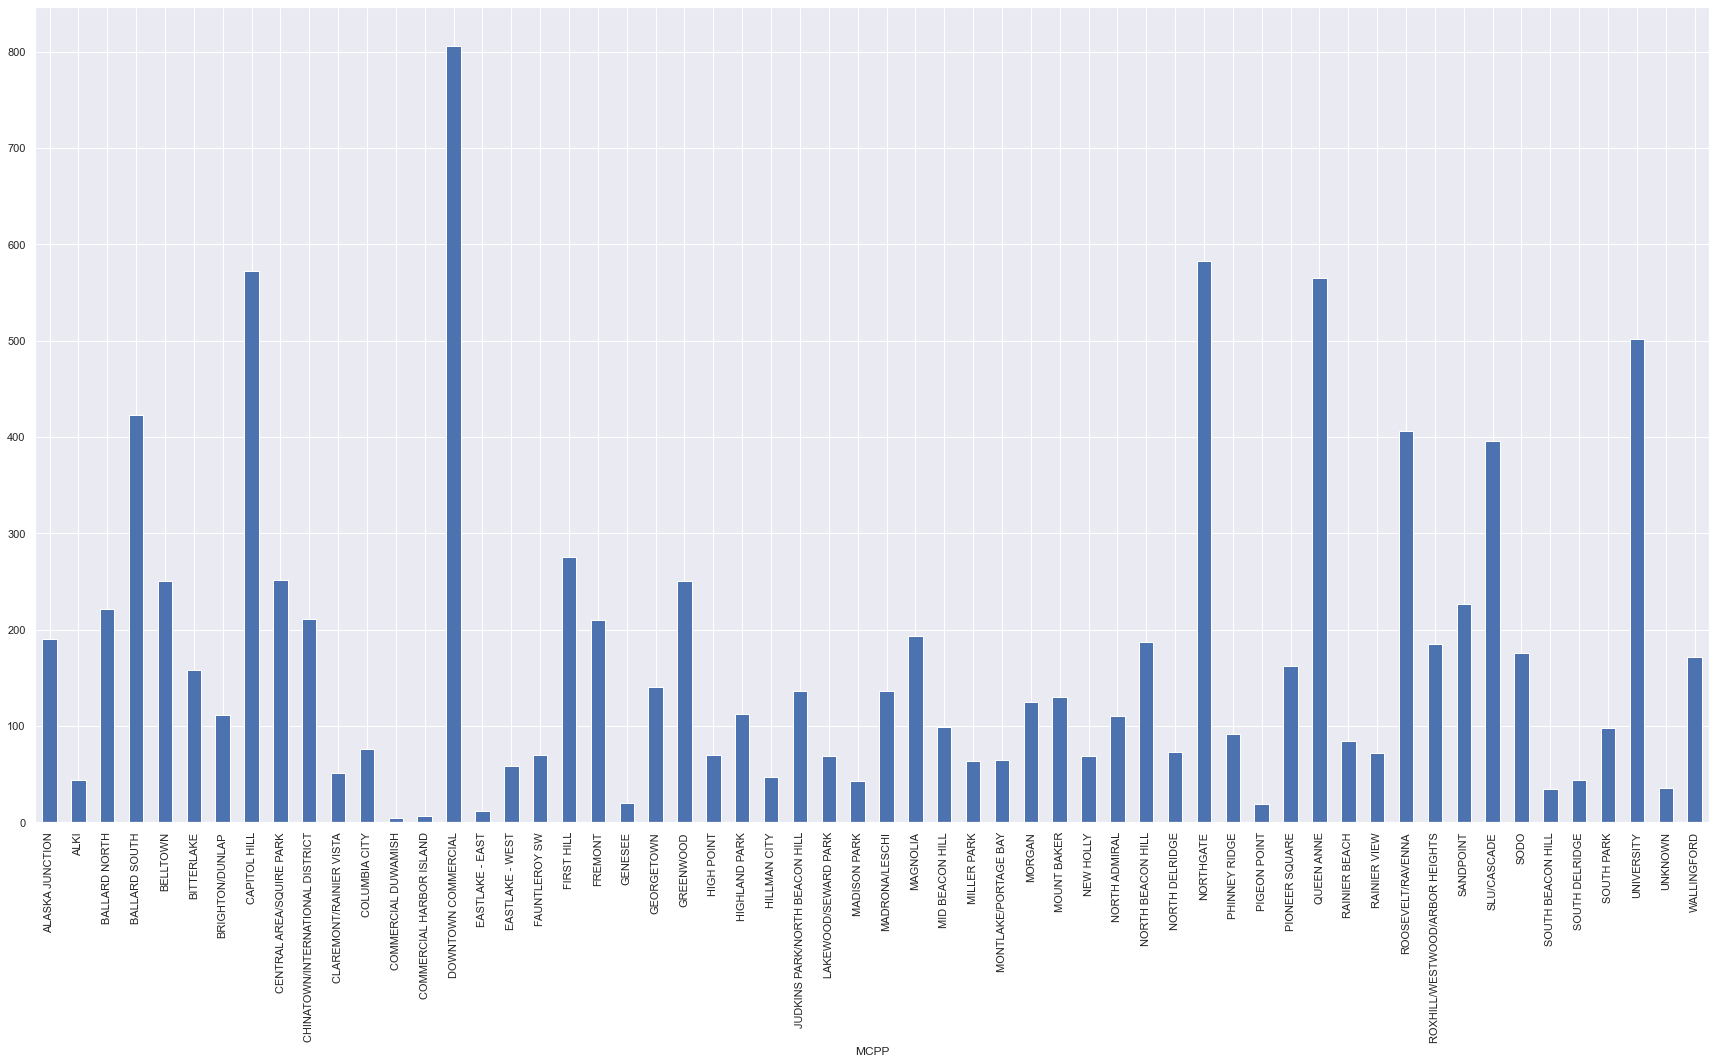

In [11]:
df.groupby(['MCPP']).count()['Offense'].plot(kind='bar', figsize=(30,15))

In [17]:
offenses = df.groupby("Offense").size()
offenses

Offense
All Other Larceny                              1435
Animal Cruelty                                    3
Arson                                            20
Bad Checks                                       18
Counterfeiting/Forgery                          107
Credit Card/Automated Teller Machine Fraud      229
Curfew/Loitering/Vagrancy Violations              2
Destruction/Damage/Vandalism of Property       1137
Driving Under the Influence                     353
Drug Equipment Violations                        10
Drug/Narcotic Violations                        149
Embezzlement                                     17
Extortion/Blackmail                              18
False Pretenses/Swindle/Confidence Game         218
Family Offenses, Nonviolent                      17
Fondling                                         50
Hacking/Computer Invasion                        25
Human Trafficking, Commercial Sex Acts            5
Identity Theft                                  208
Impe

<AxesSubplot:>

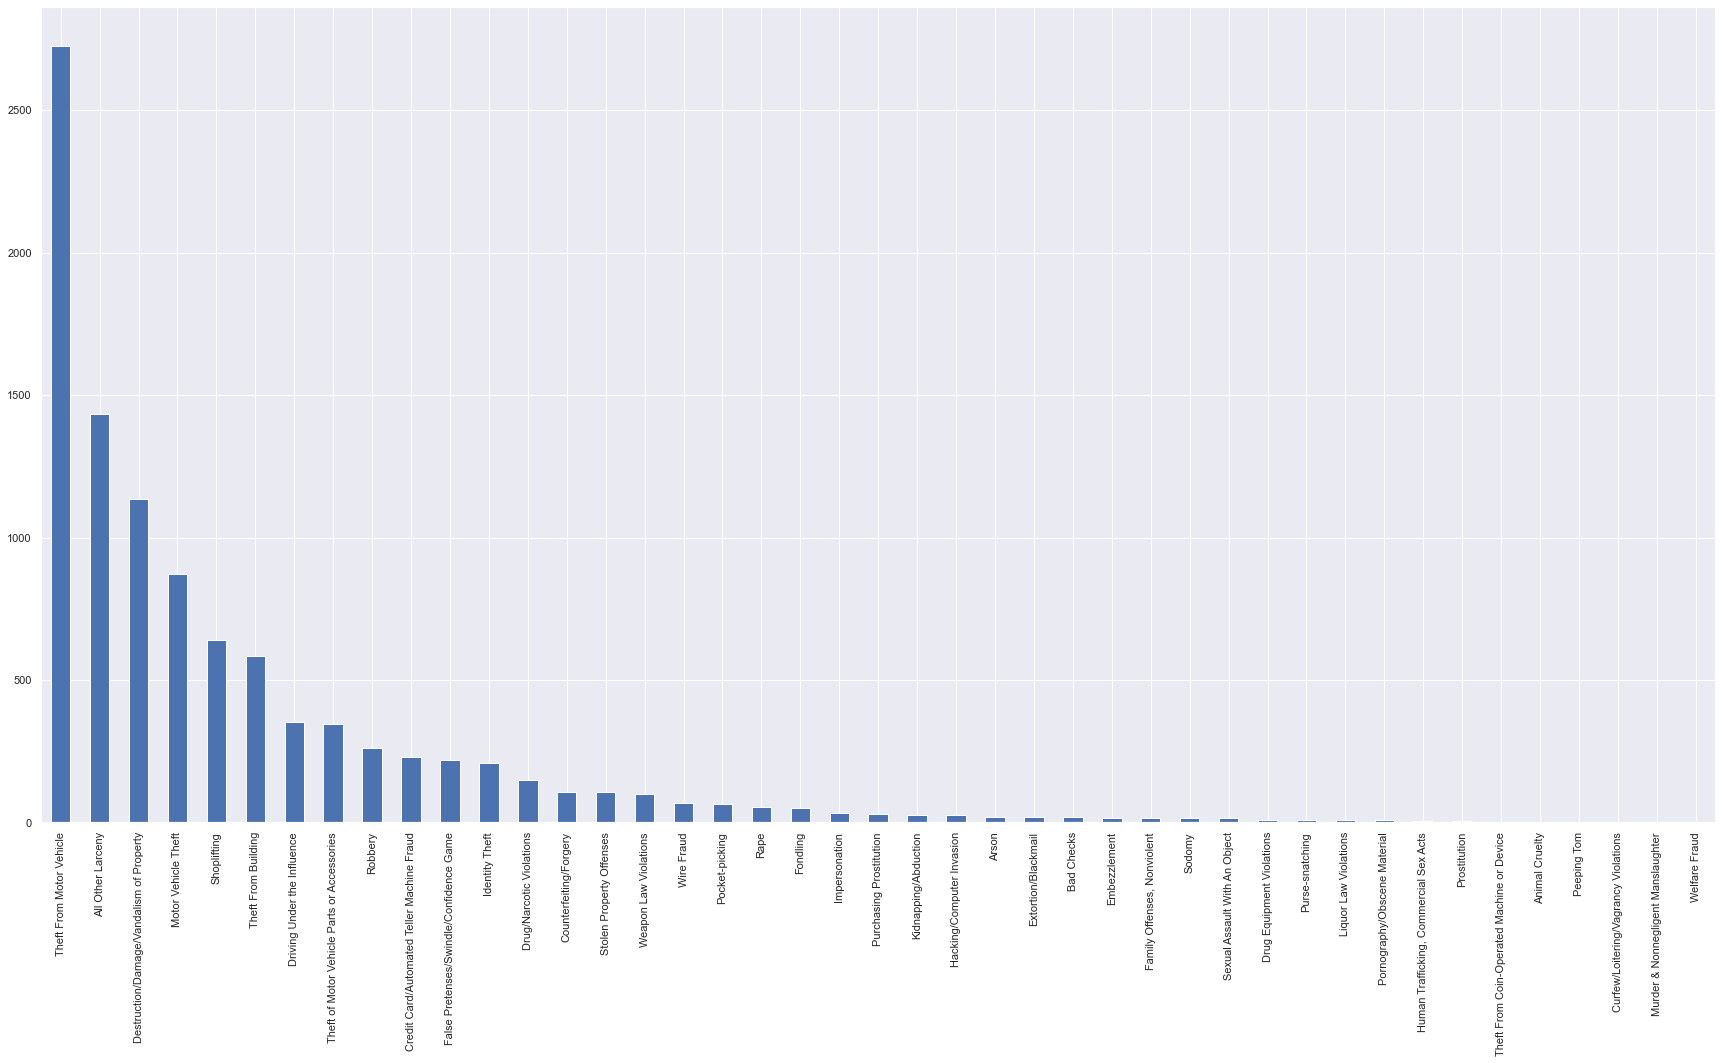

In [18]:
df['Offense'].value_counts().plot(kind='bar', figsize=(30,15))

<AxesSubplot:xlabel='count', ylabel='Offense'>

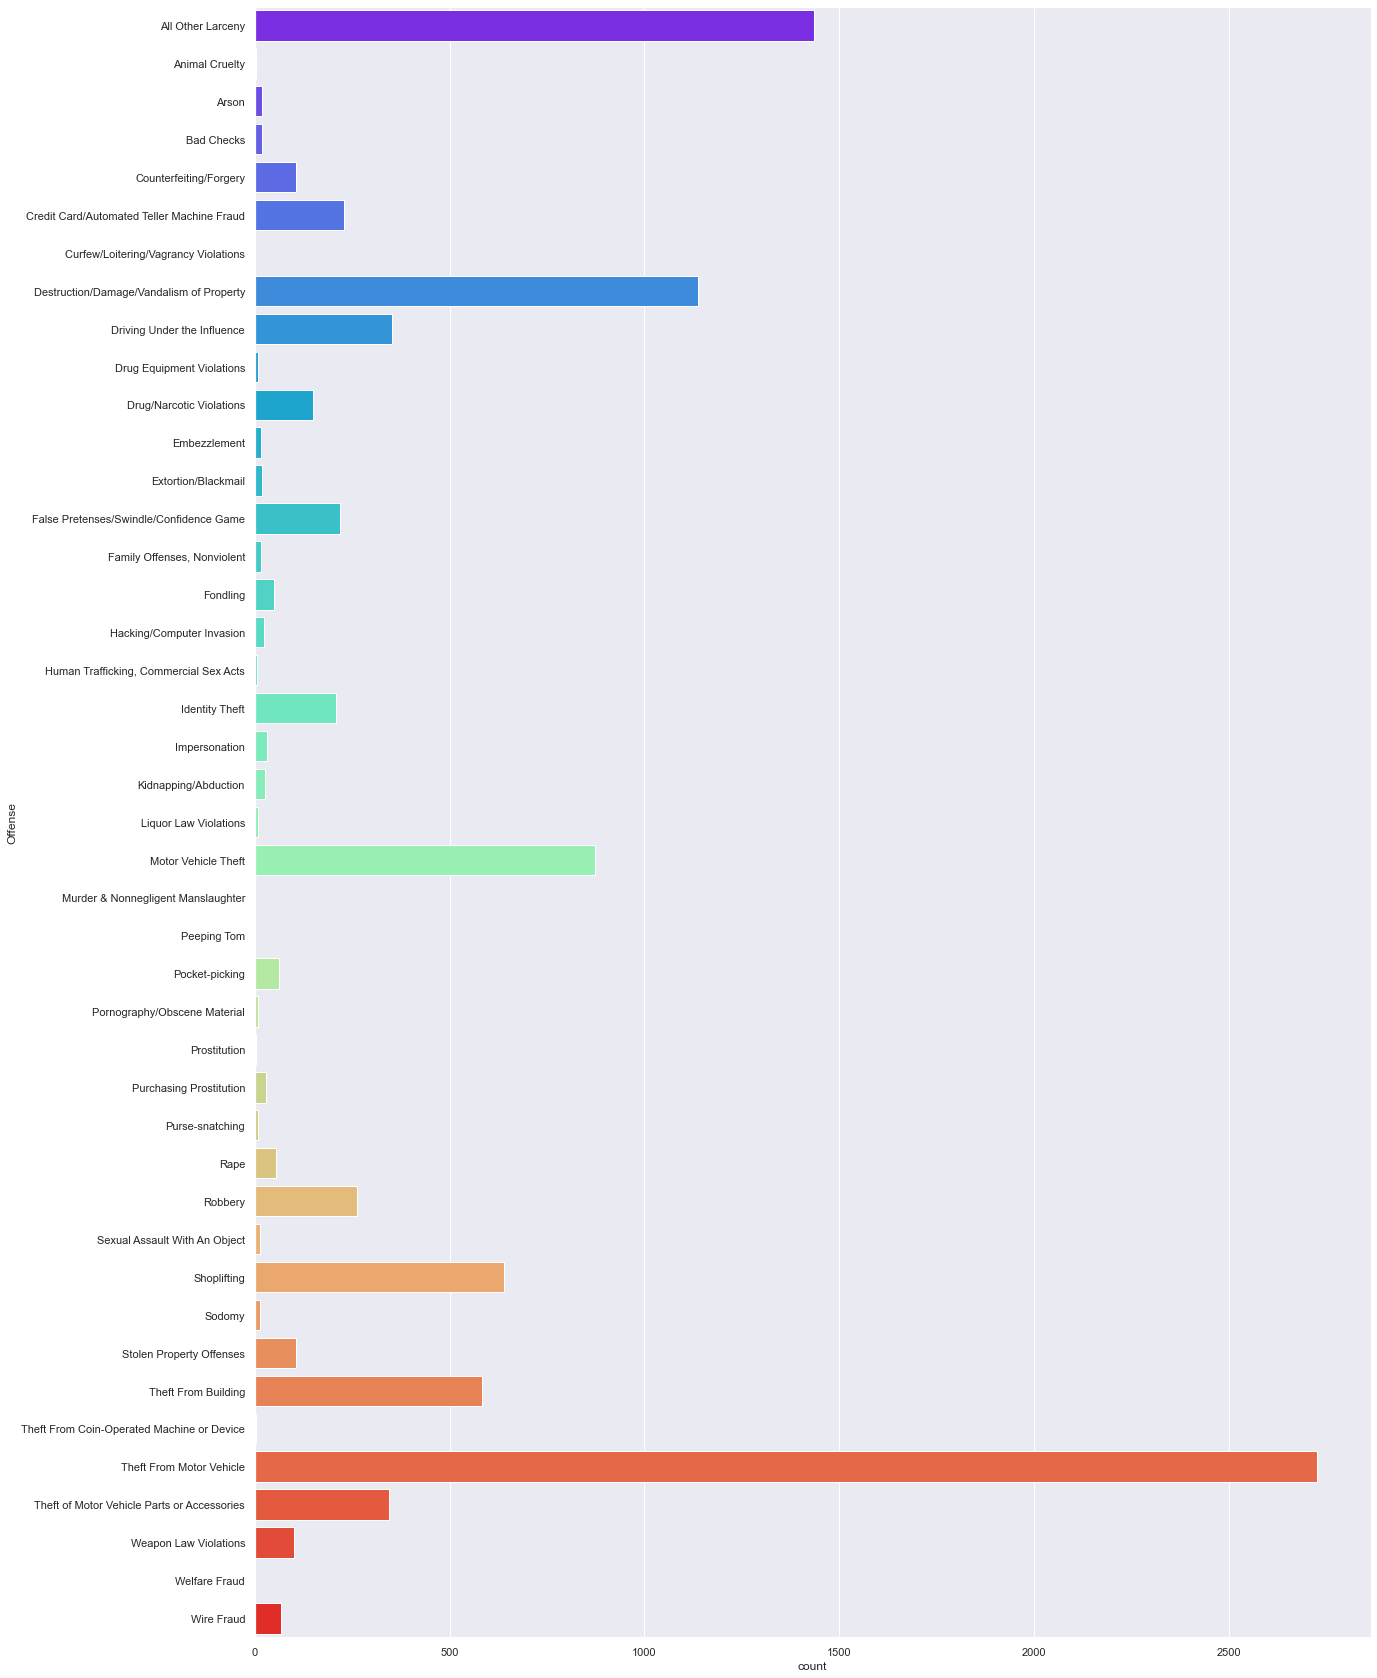

In [19]:
f, ax = plt.subplots(figsize=(20, 30))
sns.countplot(y="Offense", data=df, palette='rainbow')

<AxesSubplot:xlabel='Precinct'>

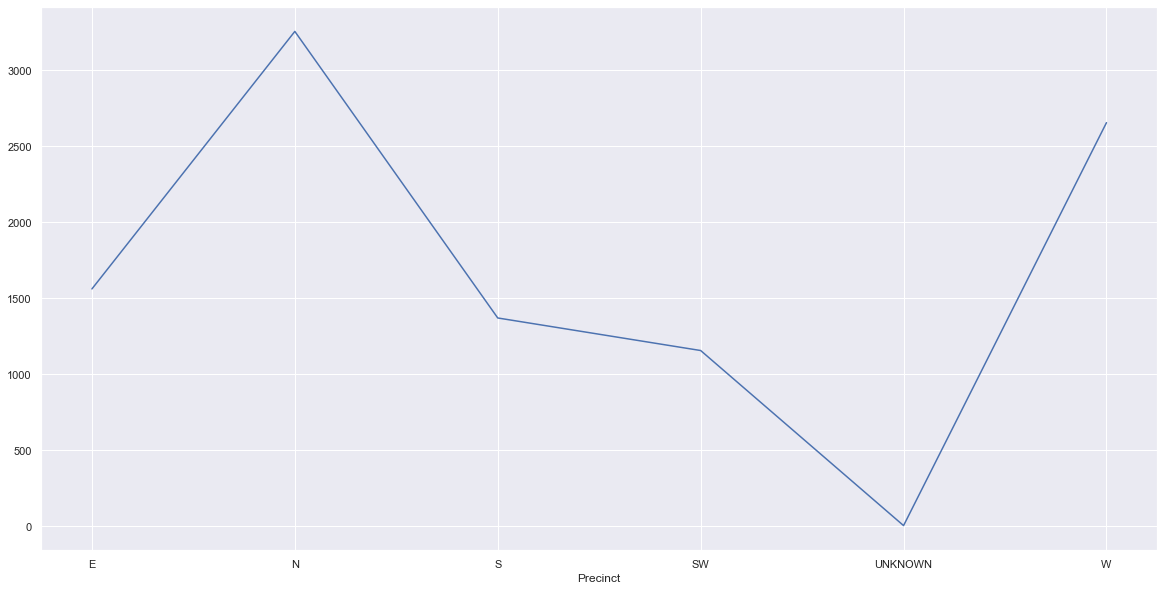

In [14]:
# plot data
fig, ax = plt.subplots(figsize=(20,10))
# use unstack()
df.groupby(['Precinct']).count()['Offense'].plot()

<AxesSubplot:xlabel='count', ylabel='Precinct'>

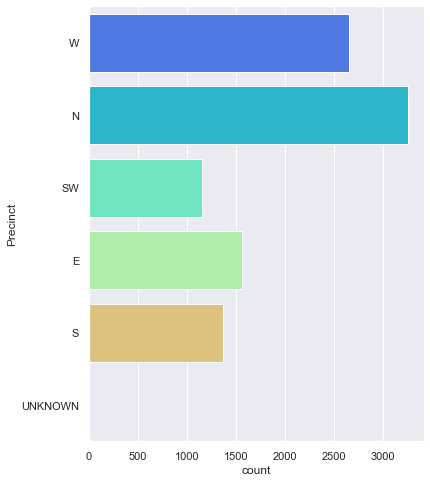

In [72]:
f, ax = plt.subplots(figsize=(6, 8))
sns.countplot(y="Precinct", data=df, palette='rainbow')

<AxesSubplot:xlabel='Sector'>

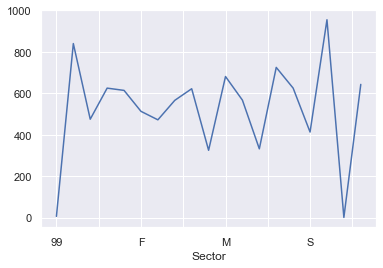

In [13]:
df.groupby(['Sector']).count()['Offense'].plot()

<AxesSubplot:xlabel='count', ylabel='Sector'>

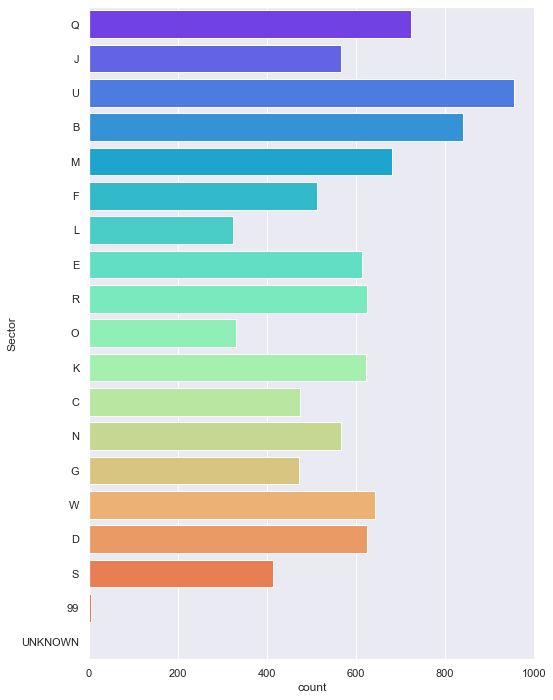

In [69]:
# df['Sector'].value_counts().plot(kind='bar', figsize=(30,15))
f, ax = plt.subplots(figsize=(8, 12))
sns.countplot(y="Sector", data=df, palette='rainbow')

<AxesSubplot:xlabel='count', ylabel='Beat'>

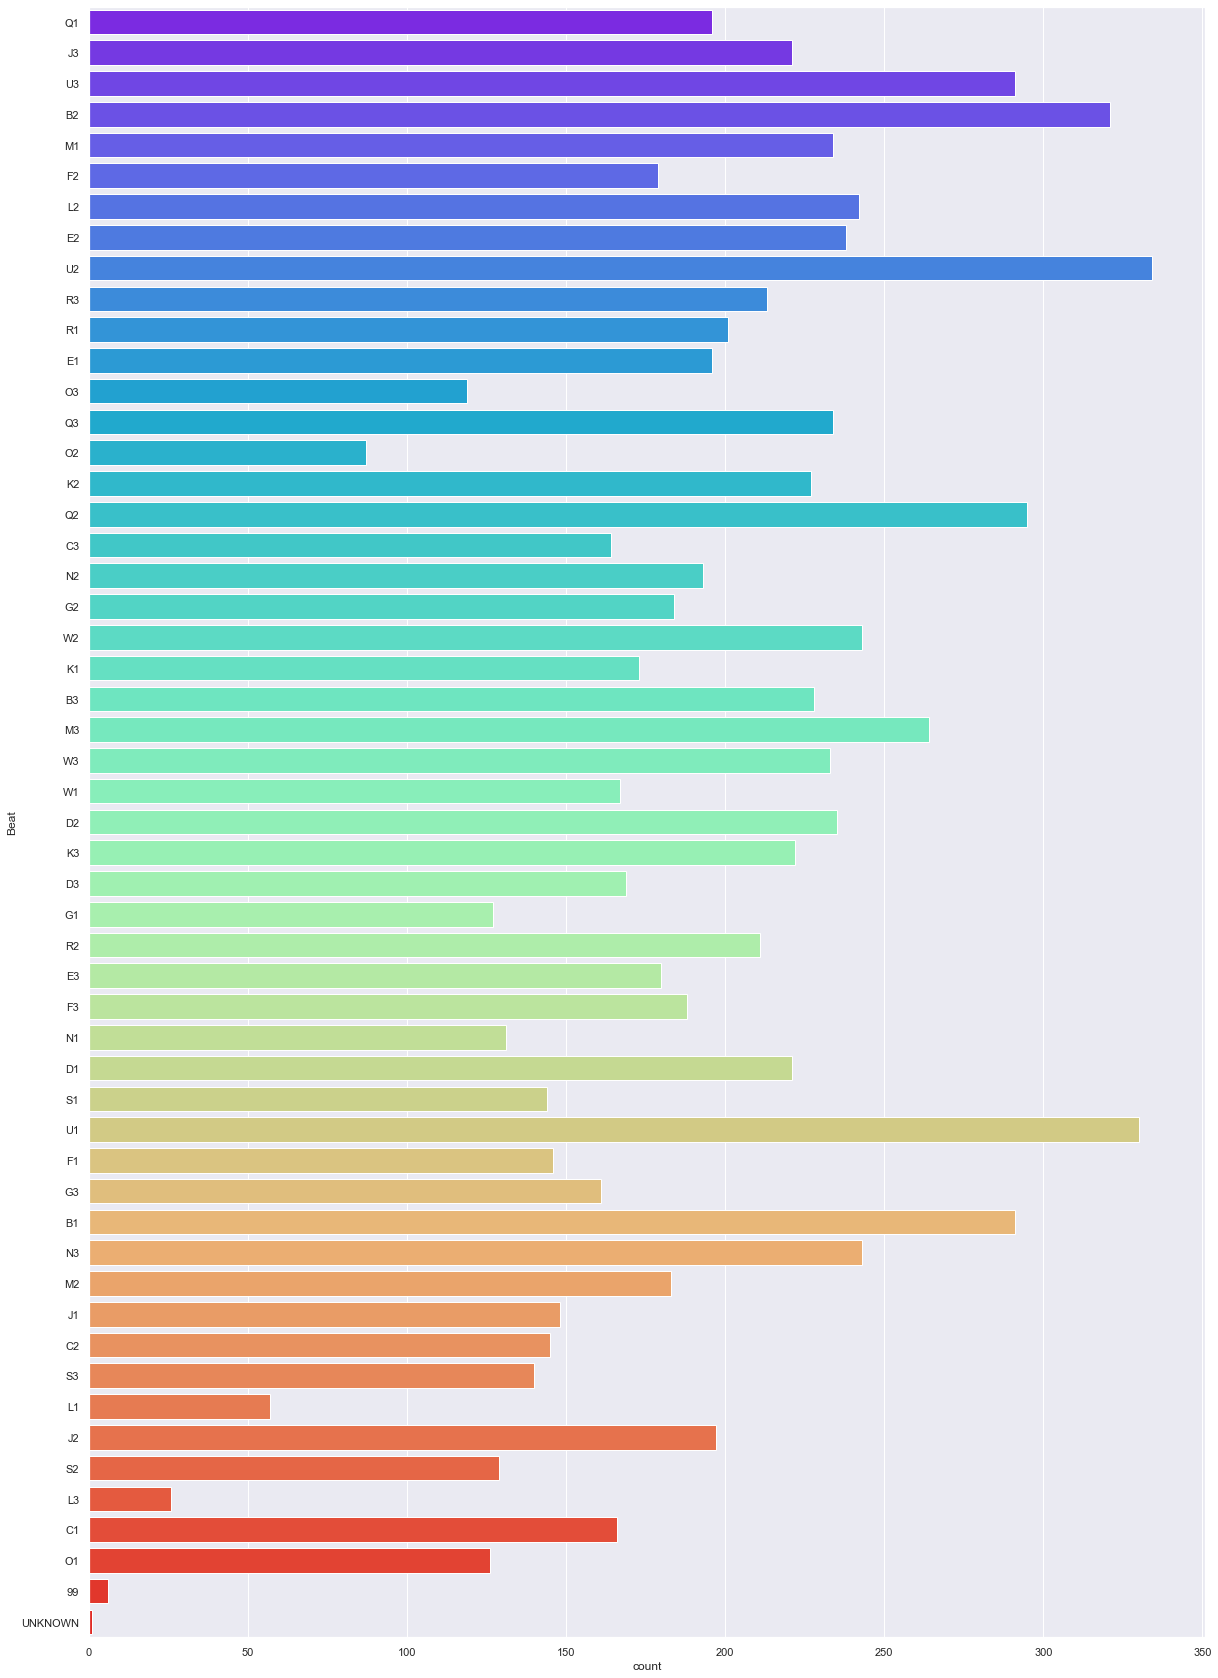

In [59]:
# df['Beat'].value_counts().plot(kind='bar', figsize=(30,15))
f, ax = plt.subplots(figsize=(20, 30))
sns.countplot(y="Beat", data=df, palette='rainbow')

In [4]:
# df = pd.read_csv (r'C:\Users\annet\Desktop\DS4A\spd_final_project\spd-use-of-force_DS4A\data\Miriam VonAschen-Cook - Crime_Data.csv', parse_dates=['Offense Start DateTime', 'Report DateTime'], nrows=10000)
# df.head(10)  



filename = r'C:\Users\annet\Desktop\DS4A\spd_final_project\spd-use-of-force_DS4A\data\Miriam VonAschen-Cook - Crime_Data.csv'
dates = pd.read_csv(filename, 
                 usecols=['Offense Start DateTime', 'Report DateTime'],
                 parse_dates=['Offense Start DateTime', 'Report DateTime'])
dates.head(10)

,Offense Start DateTime,Report DateTime
0,2020-02-05 10:10:00,2020-02-05 11:24:00
1,2020-02-03 08:00:00,2020-02-05 10:06:00
2,2020-02-02 20:30:00,2020-02-05 09:39:00
3,2020-02-05 01:17:00,2020-02-05 03:30:00
4,2020-02-05 00:51:00,2020-02-05 00:51:00
5,2020-02-04 22:59:00,2020-02-05 00:45:00
6,2020-02-04 20:30:00,2020-02-04 23:31:00
7,2020-02-04 19:58:00,2020-02-04 22:46:00
8,2020-02-04 19:01:00,2020-02-04 21:59:00
9,2020-02-04 21:00:00,2020-02-04 21:47:00


In [45]:

# dates['weekday_num'] = pd.DatetimeIndex(df['Offense Start DateTime']).weekday
# dates['weekday_name'] = pd.DatetimeIndex(df['Report DateTime']).weekday_name
# dates_grouped = (df.groupby(['weekday_num', 'weekday_name'])
#                 .size().reset_index(name="dates"))
# dates_grouped

dates['Dates_Start'] = pd.to_datetime(df['Offense Start DateTime']).dt.date
dates['Time_Start'] = pd.to_datetime(df['Offense Start DateTime']).dt.time
dates['Year_Start'] = pd.to_datetime(df['Offense Start DateTime']).dt.year
dt_month = dates['Month_Start'] = pd.to_datetime(df['Offense Start DateTime']).dt.month
dates['Day_Start'] = pd.to_datetime(df['Offense Start DateTime']).dt.day
dates['Hour_Start'] = pd.to_datetime(df['Offense Start DateTime']).dt.hour

dates['Dates_Report'] = pd.to_datetime(df['Report DateTime']).dt.date
dates['Time_Report'] = pd.to_datetime(df['Report DateTime']).dt.time
dates['Year_Report'] = pd.to_datetime(df['Report DateTime']).dt.year
dt_month = dates['Month_Report'] = pd.to_datetime(df['Report DateTime']).dt.month
dates['Day_Report'] = pd.to_datetime(df['Report DateTime']).dt.day
dates['Hour_Report'] = pd.to_datetime(df['Report DateTime']).dt.hour

dates.head(20)

,Offense Start DateTime,Report DateTime,Dates,Time,Year,Month,Day,Hour,Dates_Report,Time_Report,Year_Report,Month_Report,Day_Report,Hour_Report,Dates_Start,Time_Start,Year_Start,Month_Start,Day_Start,Hour_Start
0,2020-02-05 10:10:00,2020-02-05 11:24:00,2020-02-05,10:10:00,2020.0,2.0,5.0,10.0,2020-02-05,11:24:00,2020.0,2.0,5.0,11.0,2020-02-05,10:10:00,2020.0,2.0,5.0,10.0
1,2020-02-03 08:00:00,2020-02-05 10:06:00,2020-02-03,08:00:00,2020.0,2.0,3.0,8.0,2020-02-05,10:06:00,2020.0,2.0,5.0,10.0,2020-02-03,08:00:00,2020.0,2.0,3.0,8.0
2,2020-02-02 20:30:00,2020-02-05 09:39:00,2020-02-02,20:30:00,2020.0,2.0,2.0,20.0,2020-02-05,09:39:00,2020.0,2.0,5.0,9.0,2020-02-02,20:30:00,2020.0,2.0,2.0,20.0
3,2020-02-05 01:17:00,2020-02-05 03:30:00,2020-02-05,01:17:00,2020.0,2.0,5.0,1.0,2020-02-05,03:30:00,2020.0,2.0,5.0,3.0,2020-02-05,01:17:00,2020.0,2.0,5.0,1.0
4,2020-02-05 00:51:00,2020-02-05 00:51:00,2020-02-05,00:51:00,2020.0,2.0,5.0,0.0,2020-02-05,00:51:00,2020.0,2.0,5.0,0.0,2020-02-05,00:51:00,2020.0,2.0,5.0,0.0
5,2020-02-04 22:59:00,2020-02-05 00:45:00,2020-02-04,22:59:00,2020.0,2.0,4.0,22.0,2020-02-05,00:45:00,2020.0,2.0,5.0,0.0,2020-02-04,22:59:00,2020.0,2.0,4.0,22.0
6,2020-02-04 20:30:00,2020-02-04 23:31:00,2020-02-04,20:30:00,2020.0,2.0,4.0,20.0,2020-02-04,23:31:00,2020.0,2.0,4.0,23.0,2020-02-04,20:30:00,2020.0,2.0,4.0,20.0
7,2020-02-04 19:58:00,2020-02-04 22:46:00,2020-02-04,19:58:00,2020.0,2.0,4.0,19.0,2020-02-04,22:46:00,2020.0,2.0,4.0,22.0,2020-02-04,19:58:00,2020.0,2.0,4.0,19.0
8,2020-02-04 19:01:00,2020-02-04 21:59:00,2020-02-04,19:01:00,2020.0,2.0,4.0,19.0,2020-02-04,21:59:00,2020.0,2.0,4.0,21.0,2020-02-04,19:01:00,2020.0,2.0,4.0,19.0
9,2020-02-04 21:00:00,2020-02-04 21:47:00,2020-02-04,21:00:00,2020.0,2.0,4.0,21.0,2020-02-04,21:47:00,2020.0,2.0,4.0,21.0,2020-02-04,21:00:00,2020.0,2.0,4.0,21.0


<AxesSubplot:xlabel='count', ylabel='Month_Start'>

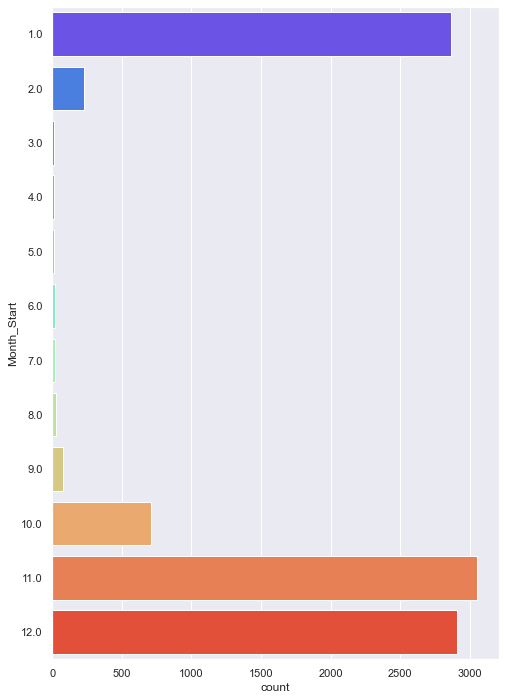

In [67]:
f, ax = plt.subplots(figsize=(8, 12))
sns.countplot(y="Month_Start", data=dates, palette='rainbow')

<AxesSubplot:xlabel='count', ylabel='Year_Start'>

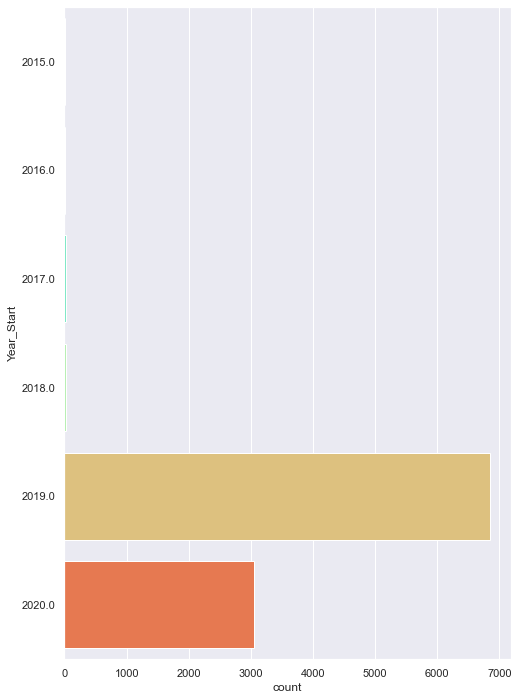

In [64]:
# plotting wideform data
# sns.lineplot(x="dt_month", y="Value", data=dates, hue="Month", palette="Dark2")
f, ax = plt.subplots(figsize=(8, 12))
sns.countplot(y="Year_Start", data=dates, palette='rainbow')

<AxesSubplot:xlabel='count', ylabel='Month_Start'>

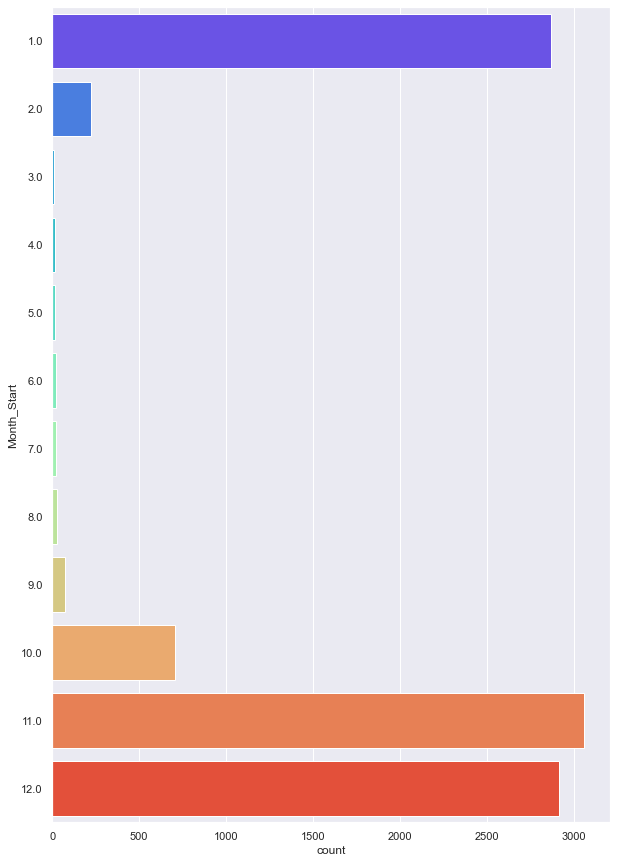

In [61]:
f, ax = plt.subplots(figsize=(10, 15))
sns.countplot(y="Month_Start", data=dates, palette='rainbow')

<AxesSubplot:xlabel='count', ylabel='Day_Start'>

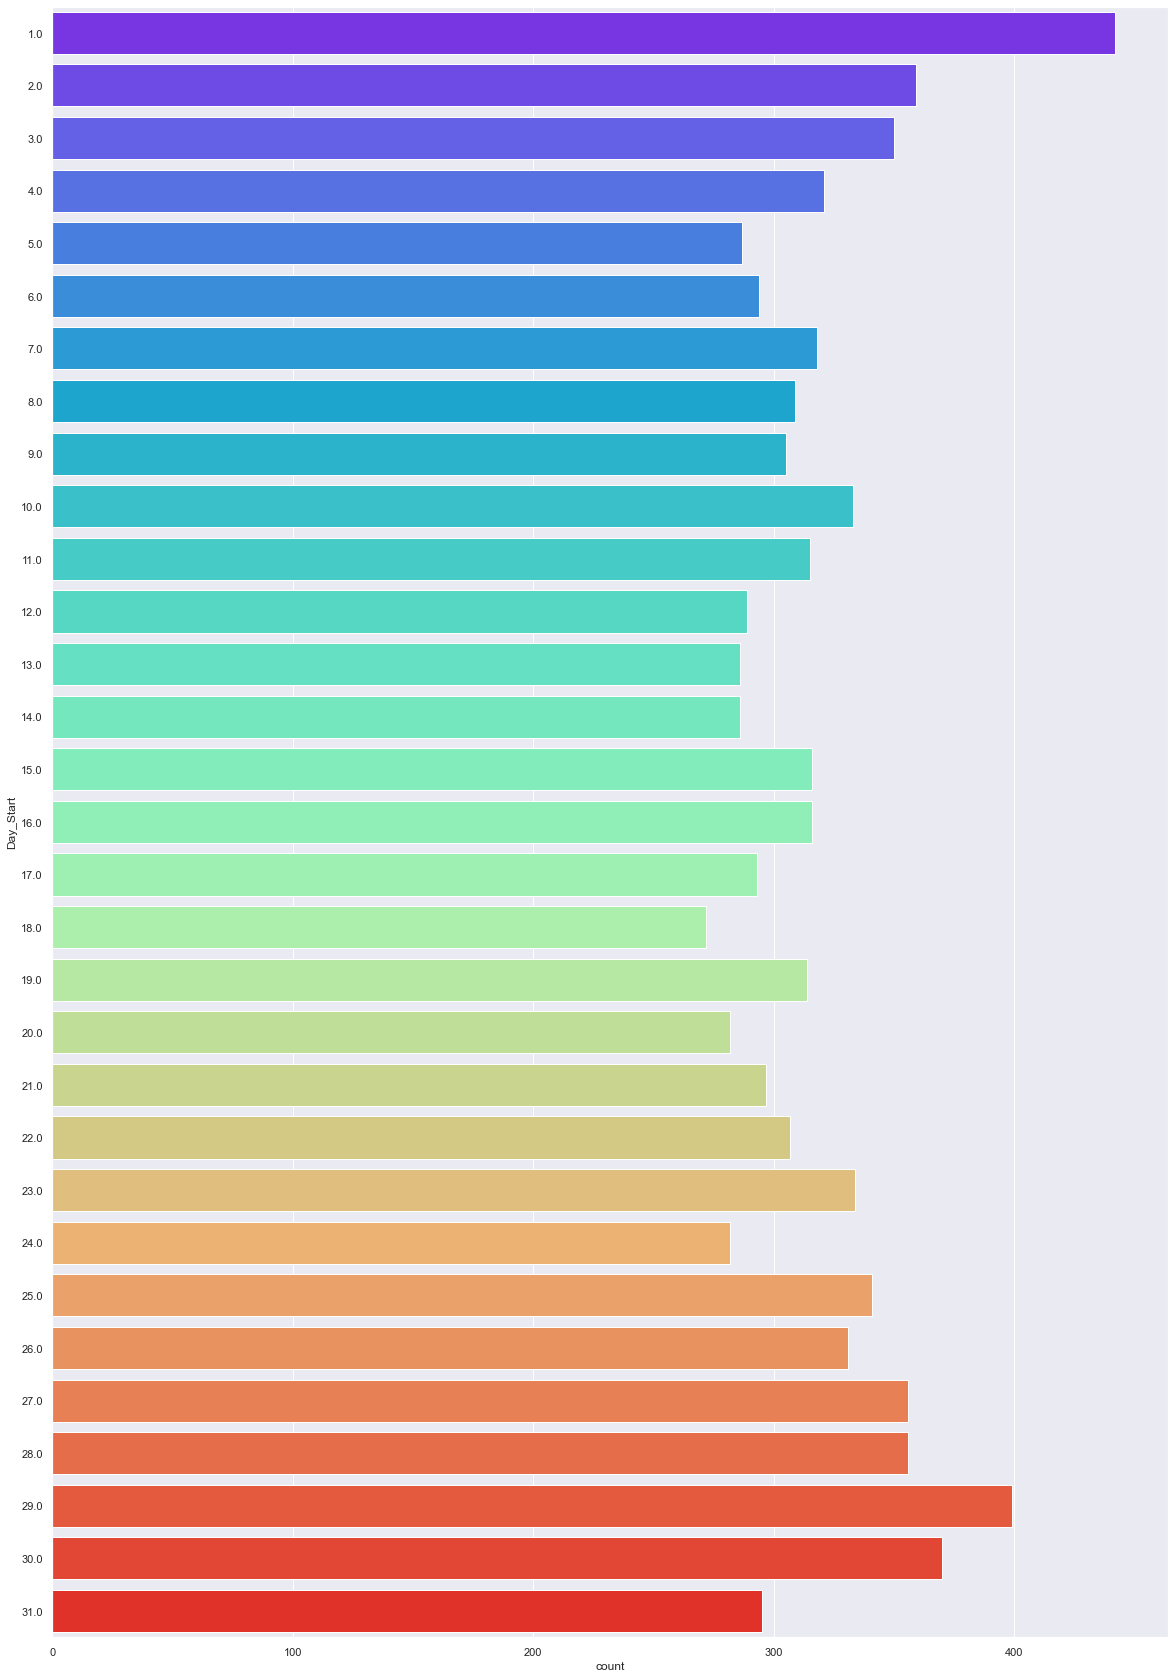

In [48]:
f, ax = plt.subplots(figsize=(20, 30))
sns.countplot(y="Day_Start", data=dates, palette='rainbow')